In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [48]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [49]:
X=df.drop('target',axis=1)
y=df['target']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
model=GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [52]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9777777777777777
[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]


In [54]:
import seaborn as sns
df=sns.load_dataset('tips')
df["sex"]=df["sex"].map({"Male":1,"Female":0})
print(df.head())

   total_bill   tip sex smoker  day    time  size
0       16.99  1.01   0     No  Sun  Dinner     2
1       10.34  1.66   1     No  Sun  Dinner     3
2       21.01  3.50   1     No  Sun  Dinner     3
3       23.68  3.31   1     No  Sun  Dinner     2
4       24.59  3.61   0     No  Sun  Dinner     4


In [55]:


# Encode "smoker": Yes=1, No=0
df["smoker"] = df["smoker"].map({"Yes": 1, "No": 0})

# Encode "time": Dinner=1, Lunch=0
df["time"] = df["time"].map({"Dinner": 1, "Lunch": 0})

# Encode "day": map weekdays to numbers
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})


In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [105]:
from sklearn.preprocessing import KBinsDiscretizer
X = df[["sex","day","time","size","total_bill","tip"]]
y=df["smoker"]

<Axes: >

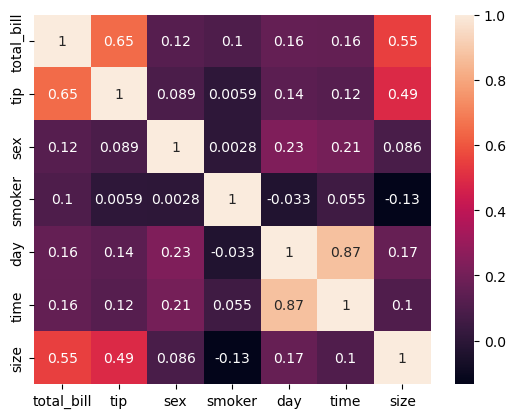

In [106]:
sns.heatmap(df.corr(),annot=True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [108]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    int32   
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(1), int32(1), int64(1)
memory usage: 6.4 KB


In [110]:
y_pred=model.predict(X_test)

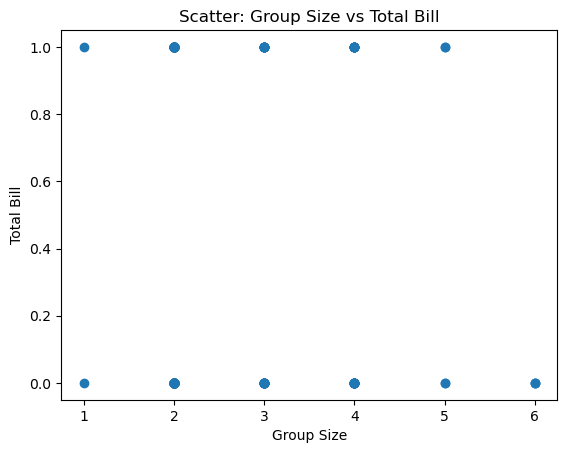

In [113]:
import matplotlib.pyplot as plt

plt.scatter(X_train["size"], y_train)
plt.xlabel("Group Size")
plt.ylabel("Total Bill")
plt.title("Scatter: Group Size vs Total Bill")
plt.show()

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6530612244897959
[[27  4]
 [13  5]]


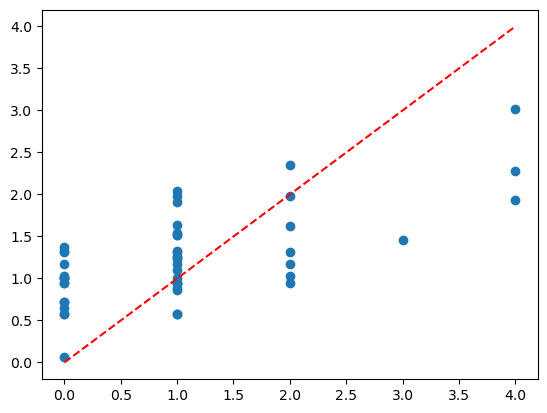

MSE: 0.687937387335821
RMSE: 0.8294199101395029
R²: 0.37481541748928615


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["sex","smoker","day","time","size"]]
y = df["total_bill"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 0.9665949669751442
RMSE: 0.9831556168659894
R² Score: 0.12157664053470052
